<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

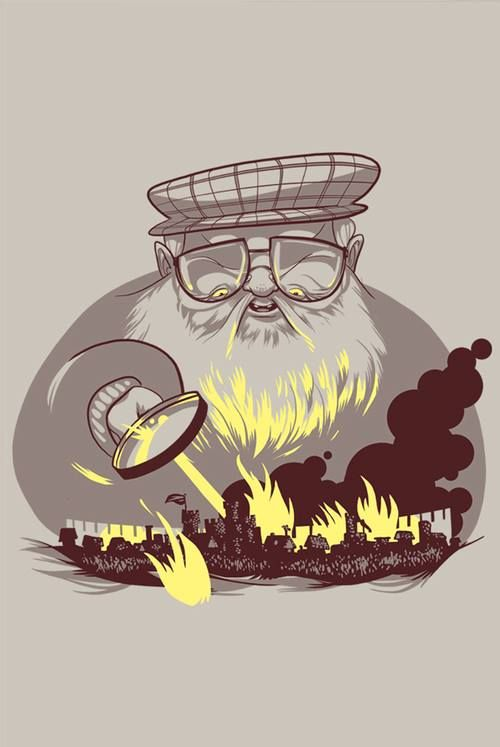

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!pip install gdown
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 -O test_dataset.csv
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v -O train_dataset.csv

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /home/rezkiy_banan/jupyter/test_dataset.csv
100%|███████████████████████████████████████| 37.3k/37.3k [00:00<00:00, 677kB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /home/rezkiy_banan/jupyter/train_dataset.csv
100%|████████████████████████████████████████| 138k/138k [00:00<00:00, 1.11MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data_train = pd.read_csv("train_dataset.csv", index_col = "S.No")
data_test = pd.read_csv("test_dataset.csv", index_col = "S.No")

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [4]:
data_train

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [6]:
data_train.isna().sum(axis = 0)

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

Наша задача состосит в том, чтобы предсказать жив персонаж в книге или нет, бОльшая часть данных в столбцах отвечающих за родителей и наследников являются NaN, помимо того, необходимость этих данных при нашей целевой переменной отсутствует.

In [7]:
data_train.drop(columns=['mother', 'father', 'heir', 'spouse'], inplace=True)
data_test.drop(columns=['mother', 'father', 'heir', 'spouse'], inplace=True)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [8]:
data_test["isPopular"] = (data_test['popularity']  > 0.5).astype(int)
data_train["isPopular"] = (data_train['popularity']  > 0.5).astype(int)
data_test["boolDeadRelations"] = (data_test['numDeadRelations']  > 0).astype(int)
data_train["boolDeadRelations"] = (data_train['numDeadRelations']  > 0).astype(int)

In [9]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [10]:

def simplify_culture(culture):
    if pd.isna(culture):  
        return culture
    culture = culture.lower().strip()  
    for key, values in cult.items():
        if culture in values:
            return key
    return culture  


data_train['culture'] = data_train['culture'].apply(simplify_culture)
data_test['culture'] = data_test['culture'].apply(simplify_culture)
def count_age(dateOfBirth, age):
    if pd.isna(age):  
        if not pd.isna(dateOfBirth):  
            return 305 - dateOfBirth  
    return age  
data_train["age"] = data_train.apply(lambda row: count_age(row["dateOfBirth"], row["age"]), axis=1)
data_test["age"] = data_test.apply(lambda row: count_age(row["dateOfBirth"], row["age"]), axis=1)


In [11]:
data_test["isDeadHint"] = (data_test["age"] + data_test["dateOfBirth"] != 305).astype(int)
data_train["isDeadHint"] = (data_train["age"] + data_train["dateOfBirth"] != 305).astype(int)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [12]:
data_train

,name,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,...,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations,isDeadHint
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,0,0,0,0,...,NaN,0,0,NaN,11,0.605351,0,1,1,1
2,Walder Frey,Lord of the Crossing,1,rivermen,208.0,House Frey,1,1,1,1,...,1.0,1,1,97.0,1,0.896321,1,1,1,0
3,Addison Hill,Ser,1,NaN,NaN,House Swyft,0,0,0,1,...,NaN,0,1,NaN,0,0.267559,1,0,0,1
4,Aemma Arryn,Queen,0,NaN,82.0,House Arryn,0,0,0,0,...,0.0,1,1,23.0,0,0.183946,0,0,0,1
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,0,0,0,1,...,1.0,1,1,29.0,0,0.043478,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,1,0,1,1,...,NaN,0,1,NaN,0,0.160535,1,0,0,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,1,1,0,0,...,NaN,0,0,NaN,0,0.040134,0,0,0,1
1555,Matthos Seaworth,NaN,1,NaN,NaN,House Seaworth,0,1,1,1,...,NaN,0,0,NaN,0,0.076923,0,0,0,1


In [13]:
data_train.drop(columns=['name', 'title', 'male', 'house'], inplace=True)
data_test.drop(columns=['name', 'title', 'male', 'house'], inplace=True)

In [14]:
data_train

,culture,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations,isDeadHint
S.No,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,1,1,1
2,rivermen,208.0,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,1,1,0
3,NaN,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,0,0,1
4,NaN,82.0,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0,0,1
5,Dornish,276.0,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,NaN,NaN,1,0,1,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1,0,0,1
1554,NaN,NaN,1,1,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0,0,0,1
1555,NaN,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0,0,0,1


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

/tmp/ipykernel_3152/3098250885.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=["red", "green"])


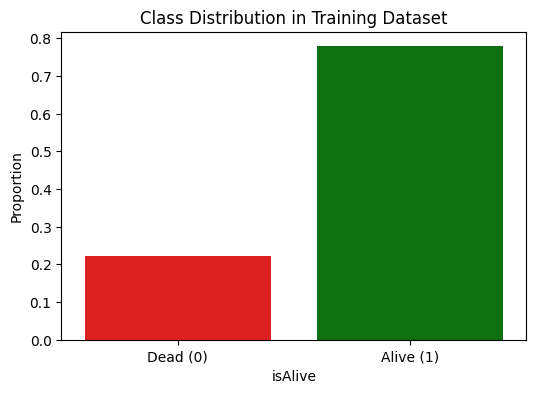

isAlive
1    0.77842
0    0.22158
Name: proportion, dtype: float64


In [15]:
class_counts = data_train["isAlive"].value_counts(normalize=True)  


plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=["red", "green"])
plt.xticks([0, 1], ["Dead (0)", "Alive (1)"])
plt.ylabel("Proportion")
plt.title("Class Distribution in Training Dataset")
plt.show()


print(class_counts)

In [16]:
data_train

,culture,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations,isDeadHint
S.No,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,1,1,1
2,rivermen,208.0,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,1,1,0
3,NaN,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,0,0,1
4,NaN,82.0,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0,0,1
5,Dornish,276.0,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,NaN,NaN,1,0,1,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1,0,0,1
1554,NaN,NaN,1,1,0,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0,0,0,1
1555,NaN,NaN,0,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0,0,0,1


In [17]:
data_train.drop(columns=['dateOfBirth', 'isAliveMother', 'isAliveHeir', 'isAliveFather', 'isAliveSpouse', 'age'], inplace=True)
data_test.drop(columns=['dateOfBirth', 'isAliveMother', 'isAliveHeir', 'isAliveFather', 'isAliveSpouse', 'age'], inplace=True)

In [18]:
data_train

,culture,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations,isDeadHint
S.No,,,,,,,,,,,,,,
1,NaN,0,0,0,0,0,0,0,11,0.605351,0,1,1,1
2,rivermen,1,1,1,1,1,1,1,1,0.896321,1,1,1,0
3,NaN,0,0,0,1,0,0,1,0,0.267559,1,0,0,1
4,NaN,0,0,0,0,0,1,1,0,0.183946,0,0,0,1
5,Dornish,0,0,0,1,0,1,1,0,0.043478,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,NaN,1,0,1,1,0,0,1,0,0.160535,1,0,0,1
1554,NaN,1,1,0,0,0,0,0,0,0.040134,0,0,0,1
1555,NaN,0,1,1,1,1,0,0,0,0.076923,0,0,0,1


In [19]:
data_train.isna().sum()

culture              1069
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isMarried               0
isNoble                 0
numDeadRelations        0
popularity              0
isAlive                 0
isPopular               0
boolDeadRelations       0
isDeadHint              0
dtype: int64

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [20]:
# ...

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [21]:
X = data_train.drop(columns=['culture', 'numDeadRelations', 'isAlive', 'popularity']) 
y = data_train['isAlive']


**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [24]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [25]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [26]:
from sklearn.metrics import accuracy_score
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [27]:
# Шаг 1. создание модели
# Создание экземпляров моделей
adaboost = AdaBoostClassifier()
random_forest = RandomForestClassifier()
gaussian_process = GaussianProcessClassifier()
gaussian_nb = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC()
decision_tree = DecisionTreeClassifier()

# Шаг 2. обучение модели
# Обучение моделей
adaboost.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gaussian_process.fit(X_train, y_train)
gaussian_nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
print("AdaBoost Accuracy:", accuracy_score(y_test, adaboost.predict(X_test)))
print("Random Forest Accuracy:", accuracy_score(y_test, random_forest.predict(X_test)))
print("GaussianProcessClassifier:", accuracy_score(y_test, gaussian_process.predict(X_test)))
print("GaussianNB:", accuracy_score(y_test, gaussian_nb.predict(X_test)))
print("KNeighborsClassifier:", accuracy_score(y_test, knn.predict(X_test)))
print("SVC:", accuracy_score(y_test, svc.predict(X_test)))
print("DecisionTreeClassifier:", accuracy_score(y_test, decision_tree.predict(X_test)))

AdaBoost Accuracy: 0.782051282051282
Random Forest Accuracy: 0.7756410256410257
GaussianProcessClassifier: 0.7788461538461539
GaussianNB: 0.3269230769230769
KNeighborsClassifier: 0.7692307692307693
SVC: 0.7788461538461539
DecisionTreeClassifier: 0.782051282051282


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [28]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [40]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7756


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [30]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7756


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [31]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /home/rezkiy_banan/jupyter/submission.csv
100%|██████████████████████████████████████| 2.74k/2.74k [00:00<00:00, 30.4MB/s]


In [32]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [33]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [34]:
data_test

,culture,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isPopular,boolDeadRelations,isDeadHint
S.No,,,,,,,,,,,,,
1558,NaN,0,0,0,0,1,0,0,0,0.050167,0,0,1
1559,Asshai,0,1,1,1,1,0,0,0,0.745819,1,0,1
1560,NaN,0,0,1,1,0,0,0,0,0.010033,0,0,1
1561,NaN,1,1,1,1,1,0,1,0,0.220736,0,0,1
1562,riverlands,1,1,1,1,1,1,0,0,0.434783,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Westerosi,1,1,1,1,1,0,0,0,0.351171,0,0,1
1943,NaN,0,1,0,1,1,0,0,0,0.096990,0,0,1
1944,NaN,1,1,1,1,1,0,0,0,0.030100,0,0,1


In [35]:
submission_arr = random_forest.predict(data_test.drop(columns = ['culture', 'numDeadRelations', 'popularity']))

In [36]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [37]:
submission['isAlive'] = submission_arr

Как сохранить измененный Pandas DataFrame в csv файл:

In [38]:
submission.to_csv("new_submission.csv", index=False)